In [1]:
!pip install ipython-sql
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install pandas 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [4]:
%sql sqlite:///socioeconomic.db

In [5]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [6]:
# Install the 'ipython-sql' and 'prettytable' libraries using pip
!pip install ipython-sql prettytable

# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [7]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [8]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [9]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [13]:
# to get max hardship index
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [ ]:
# 4-1: Find the community area with the highest hardship index.
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [15]:
# 4-2: Find the community area with the highest hardship index.
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [16]:
# 4-3: Find the community area with the highest hardship index.
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [17]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
 * sqlite:///socioeconomic.db
Done.


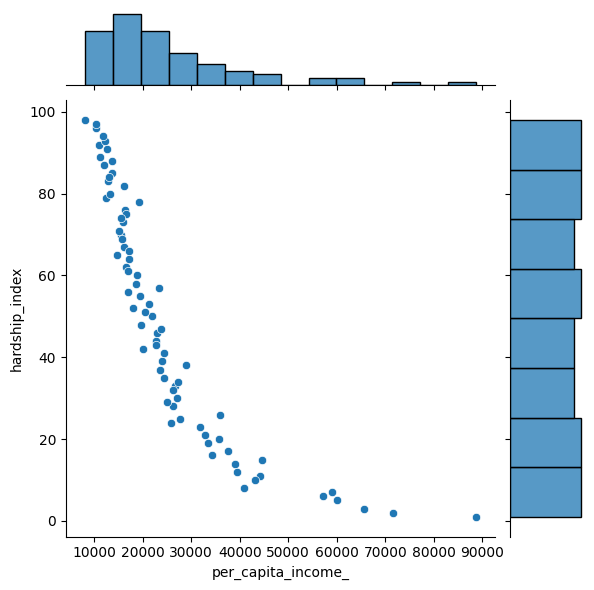

In [18]:
# problem 6
!pip install matplotlib seaborn
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

